<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/SavingTheModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

In [2]:
print("Version:", tf.__version__)

Version: 2.8.0


In [3]:
#Load the dataset 
mnist = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
#We split the dataset into train test 
(train_images, train_labels), (test_images, test_labels) = mnist

In [5]:
#We then normalize our dataset before passing it into our computational graph 
train_images = train_images/255.0 
test_images = test_images/255.0

In [6]:
class_names=['zero','one','two', 'three', 'four', 'five', 'six', 'seven', 'eight','nine'] #list of all the class names 

Text(0.5, 0, 'five')

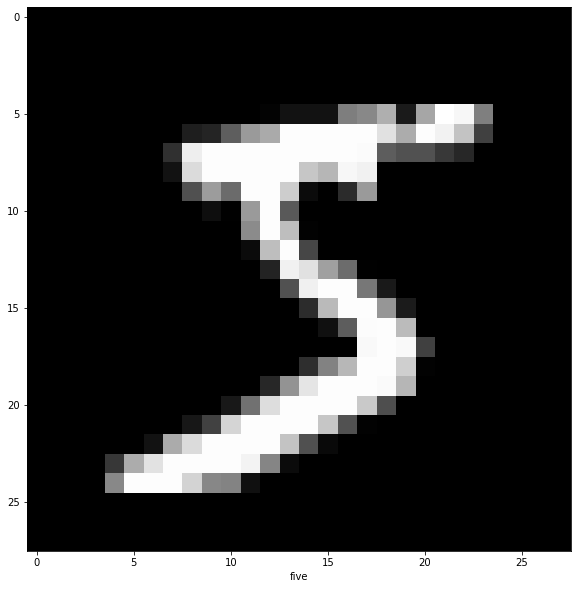

In [7]:
#We visulize our dataset to check whether they are labeled correctly before we begin training
plt.figure(figsize=(10,10))
#plt.axis('off')
plt.imshow(train_images[0], cmap='gray')
plt.xlabel(class_names[train_labels[0]])

In [52]:
def createModel():
  #Now that the data is labeled correctly we can now build the computational graph 
    model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=train_images[0].shape),
   #First layer of our model it takes the input image and 
   #flattens it into a one dimensional array which is a vector
   tf.keras.layers.BatchNormalization(), #Using batch Normalization to speed up training and  prevent vanishing and exploding gradients
   tf.keras.layers.Dense(300,kernel_initializer="he_normal"),
   tf.keras.layers.Activation('elu'), #pass in an activation function in this case I'll use Exponential linear unit
   tf.keras.layers.Dense(100,kernel_initializer="he_normal"), #Use he_normal initialization to prevent vanishing and exploding gradients and also speed up training
   tf.keras.layers.Activation('elu'),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.Dense(10, activation="softmax") 
])
    #Compile the model
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
    return model


In [54]:
model = createModel()

In [13]:
#Compiling the model we declare the hyperparameters before we train

In [55]:
#We create a checkpoint and a callback to save our model during training 
check_point = "train_point.ckpt"
call_back = tf.keras.callbacks.ModelCheckpoint(check_point,verbose=1,save_best_only=True)

In [15]:
History = model.fit(train_images,train_labels, epochs=15,validation_data=[test_images, test_labels], callbacks=[call_back]) 

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1869/1875 [============================>.] - ETA: 0s - loss: 0.2168 - accuracy: 0.9342
Epoch 1: val_loss improved from inf to 0.10820, saving model to train_point.ckpt
INFO:tensorflow:Assets written to: train_point.ckpt/assets
1875/1875 [==============================] - 16s 7ms/step - loss: 0.2164 - accuracy: 0.9343 - val_loss: 0.1082 - val_accuracy: 0.9683
Epoch 2/15
1872/1875 [============================>.] - ETA: 0s - loss: 0.1057 - accuracy: 0.9679
Epoch 2: val_loss improved from 0.10820 to 0.08656, saving model to train_point.ckpt
INFO:tensorflow:Assets written to: train_point.ckpt/assets
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1057 - accuracy: 0.9679 - val_loss: 0.0866 - val_accuracy: 0.9755
Epoch 3/15
1866/1875 [============================>.] - ETA: 0s - loss: 0.0777 - accuracy: 0.9757
Epoch 3: val_loss improved from 0.08656 to 0.08210, saving model to train_point.ckpt
INFO:tensorflow:Assets written to: train_point.ckpt/assets
1875/1875 [==========

In [56]:
#We create another instance of the model 
modelOne = createModel()

In [57]:
#Lets evaluate the model to check its accuracy before training
loss, accuracy = modelOne.evaluate(test_images,test_labels,verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 2.4870 - accuracy: 0.1037 - 1s/epoch - 3ms/step


In [58]:
loss

2.4870057106018066

In [59]:
accuracy #Here the accuracy is about 14%

0.10369999706745148

In [60]:
#We now load the saved weights and test the accuracy
modelOne.load_weights(check_point)

In [61]:
#We now check  the accuracy of our model 
loss, accuracy  = modelOne.evaluate(test_images,test_labels, verbose=2) #The accuracy has improved after loading the weights it is now 97%

313/313 - 1s - loss: 0.0721 - accuracy: 0.9794 - 796ms/epoch - 3ms/step


In [62]:
batch_size = 32

In [63]:
#We create a checkpoint that saves the model using unique names after every five seconds 
check_point = "train_2/cp-{epoch:04d}.ckpt"
callback_dir = tf.keras.callbacks.ModelCheckpoint(check_point, verbose=2, save_weights_only=True,save_freq=5 *batch_size)
#This callback saves the model after every five seconds 

In [64]:
#We create another model instance 
modelFive = createModel()

In [65]:
modelFive.build()

In [66]:
#Save the model's weights using the checkpoint we created earlier
modelFive.save_weights(check_point.format(epoch=0))

In [71]:
from gc import callbacks
#We now train the model using the new callbacks 
historyFive = modelFive.fit(train_images, train_labels, epochs =20, batch_size=batch_size, validation_data=[test_images,test_labels],callbacks=[callback_dir], verbose =1)

Epoch 1/20

Epoch 1: saving model to train_2/cp-0001.ckpt

Epoch 1: saving model to train_2/cp-0001.ckpt

Epoch 1: saving model to train_2/cp-0001.ckpt

Epoch 1: saving model to train_2/cp-0001.ckpt

Epoch 1: saving model to train_2/cp-0001.ckpt

Epoch 1: saving model to train_2/cp-0001.ckpt

Epoch 1: saving model to train_2/cp-0001.ckpt

Epoch 1: saving model to train_2/cp-0001.ckpt

Epoch 1: saving model to train_2/cp-0001.ckpt

Epoch 1: saving model to train_2/cp-0001.ckpt

Epoch 1: saving model to train_2/cp-0001.ckpt
1875/1875 - 9s - loss: 0.0992 - accuracy: 0.9698 - val_loss: 0.0794 - val_accuracy: 0.9755 - 9s/epoch - 5ms/step
Epoch 2/20

Epoch 2: saving model to train_2/cp-0002.ckpt

Epoch 2: saving model to train_2/cp-0002.ckpt

Epoch 2: saving model to train_2/cp-0002.ckpt

Epoch 2: saving model to train_2/cp-0002.ckpt

Epoch 2: saving model to train_2/cp-0002.ckpt

Epoch 2: saving model to train_2/cp-0002.ckpt

Epoch 2: saving model to train_2/cp-0002.ckpt

Epoch 2: saving mo

In [72]:
os.listdir(check_point_dir) #Here we can list the directories of the saved models

['cp-0000.ckpt.data-00000-of-00001',
 'cp-0003.ckpt.index',
 'cp-0020.ckpt.index',
 'checkpoint',
 'cp-0020.ckpt.data-00000-of-00001',
 'cp-0002.ckpt.data-00000-of-00001',
 'cp-0008.ckpt.index',
 'cp-0017.ckpt.data-00000-of-00001',
 'cp-0013.ckpt.index',
 'cp-0009.ckpt.index',
 'cp-0018.ckpt.index',
 'cp-0015.ckpt.index',
 'cp-0019.ckpt.index',
 'cp-0007.ckpt.index',
 'cp-0016.ckpt.data-00000-of-00001',
 'cp-0005.ckpt.index',
 'cp-0006.ckpt.data-00000-of-00001',
 'cp-0003.ckpt.data-00000-of-00001',
 'cp-0010.ckpt.index',
 'cp-0019.ckpt.data-00000-of-00001',
 'cp-0012.ckpt.index',
 'cp-0015.ckpt.data-00000-of-00001',
 'cp-0014.ckpt.data-00000-of-00001',
 'cp-0016.ckpt.index',
 'cp-0010.ckpt.data-00000-of-00001',
 'cp-0004.ckpt.data-00000-of-00001',
 'cp-0004.ckpt.index',
 'cp-0017.ckpt.index',
 'cp-0013.ckpt.data-00000-of-00001',
 'cp-0011.ckpt.index',
 'cp-0011.ckpt.data-00000-of-00001',
 'cp-0002.ckpt.index',
 'cp-0007.ckpt.data-00000-of-00001',
 'cp-0001.ckpt.index',
 'cp-0000.ckpt.i

In [74]:
#We can get the latest saved model through:
latest = tf.train.latest_checkpoint(check_point_dir)

In [75]:
latest #This was the last saved model during training 

'train_2/cp-0020.ckpt'

In [77]:
#We can test these weights by creating a new instance of our model and loading the weights then test the accuracy
modelNew = createModel()

In [79]:
loss,accuracy = modelNew.evaluate(test_images, test_labels,verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 2.5062 - accuracy: 0.0585


In [81]:
accuracy * 100 #The before training accuracy of our model is: 5% 

5.849999934434891

In [82]:
#After loading the saved weights accuracy:
modelNew.load_weights(latest) #We pass in the path to our latest saved model

In [83]:
loss, accuracy = modelNew.evaluate(test_images, test_labels, verbose =1 )#Evaluate the model, verbose shows you the progress of our training 

313/313 [==============================] - 1s 3ms/step - loss: 0.1071 - accuracy: 0.9793


In [84]:
accuracy * 100 #Here the accuracy has improved after assigning the weights of the model that was saved last during training to the new model

97.93000221252441

In [ ]:
#What are these files??